# Project Name-Sales Prediction Using Python


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading Dataset

In [2]:
df=pd.read_csv("Downloads\Sales predictions.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Aim-
Sales prediction involves forecasting the amount of a product thatcustomers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

In [3]:
df.shape

(200, 4)

In [4]:
#To describe the statistical summary of data.
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Basic Observation
Average expence is highest on TV

Avg expence is highest on Radio

Max sale is 27 and min sale is 1.6

In [5]:
#to display basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Preprocessing the dataset

In [6]:
#check for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Exploratory Data Analysis

### Scatter plot

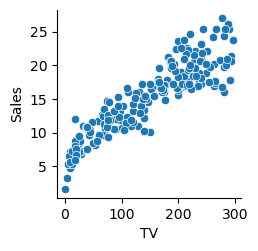

In [7]:
sns.pairplot(df,x_vars='TV',y_vars='Sales',kind='scatter')
plt.show()

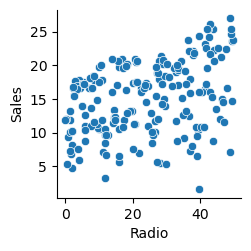

In [8]:
sns.pairplot(df,x_vars='Radio',y_vars='Sales',kind='scatter')
plt.show()

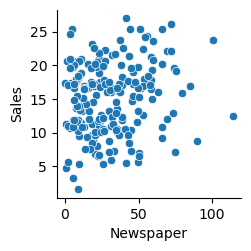

In [9]:
sns.pairplot(df,x_vars='Newspaper',y_vars='Sales',kind='scatter')
plt.show()

#### Pair Plot Observations
When advertising cost increases in TV Ads the sales will increases as well.While for Newspaper and Radio it's lil bit unpredictable.

### Histogram

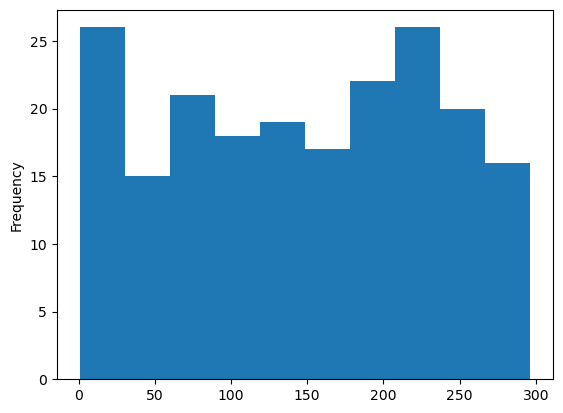

In [10]:
df['TV'].plot.hist(bins=10,xlabel='TV')
plt.show()

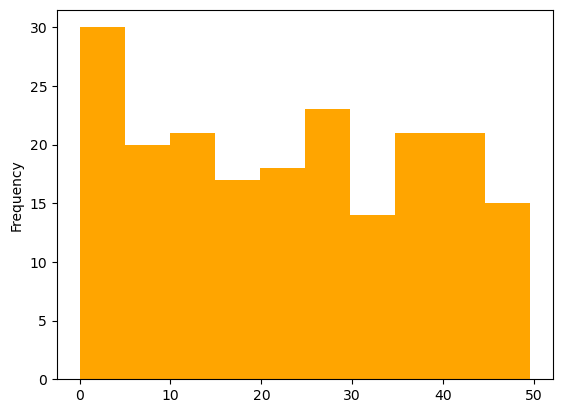

In [11]:
df['Radio'].plot.hist(bins=10,color='orange',xlabel='Radio')
plt.show()

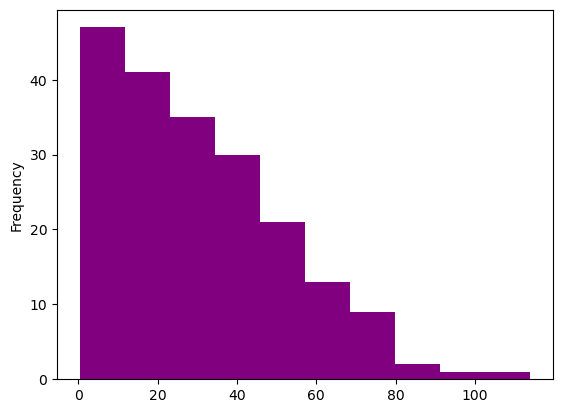

In [12]:
df['Newspaper'].plot.hist(bins=10,color='purple',xlabel='newspaper')
plt.show()

#### Histogram Observations-
The majority Sales is the result of low advertising cost in newspaper

### Correlation Matrix

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


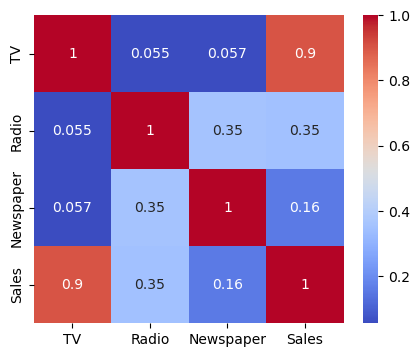

In [14]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#### Sales are highly Correlated with the TV

In [15]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
df['TV']=le.fit_transform(df['TV'])
df.head()

,TV,Radio,Newspaper,Sales
0,153,37.8,69.2,22.1
1,32,39.3,45.1,10.4
2,12,45.9,69.3,12.0
3,98,41.3,58.5,16.5
4,112,10.8,58.4,17.9


###### Lets train our model using linear regression as it is correlated with only one variable TV.

In [17]:
from sklearn.model_selection import train_test_split
x=df['TV']
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.30,random_state=100)

In [18]:
print(x_train)

74     134
3       98
185    128
26      94
90      85
      ... 
87      73
103    116
67      90
24      40
8        6
Name: TV, Length: 140, dtype: int64


In [19]:
print(y_train)

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64


In [20]:
print(x_test)

126      4
104    157
99      86
92     140
111    162
167    129
116     89
96     122
52     138
69     139
164     76
124    152
182     37
154    115
125     58
196     63
194     96
177    106
163    101
31      74
11     136
73      82
15     121
41     111
97     114
128    144
133    143
82      51
139    114
123     80
83      44
65      45
151     79
162    117
170     35
77      78
32      66
173    105
174    146
85     119
168    137
112    110
171    102
181    142
7       77
46      60
75      11
28     165
29      47
195     28
40     126
153    107
115     50
64      83
59     132
1       32
192     12
136     21
152    122
161     57
Name: TV, dtype: int64


In [21]:
print(y_test)

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64


In [22]:
import statsmodels.api as sn

In [23]:
x_train_sn=sn.add_constant(x_train)

In [24]:
lr=sn.OLS(y_train,x_train_sn).fit()

In [25]:
lr.params

const    6.814235
TV       0.085372
dtype: float64

In [26]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     594.3
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           7.30e-52
Time:                        15:46:38   Log-Likelihood:                -322.72
No. Observations:                 140   AIC:                             649.4
Df Residuals:                     138   BIC:                             655.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8142      0.394     17.278      0.0

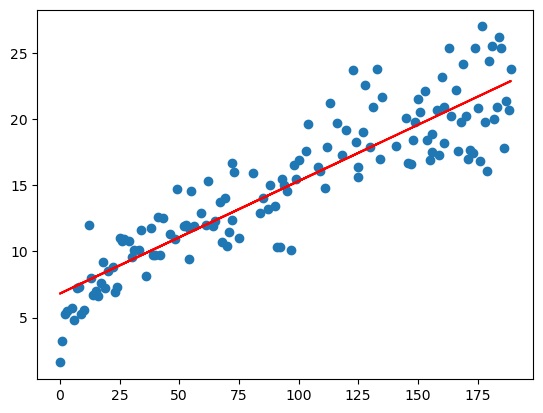

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.814+0.085*x_train,"r")
plt.show()

### Model Evaluation

In [29]:
y_train_pred=lr.predict(x_train_sn)
res=(y_train-y_train_pred)

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


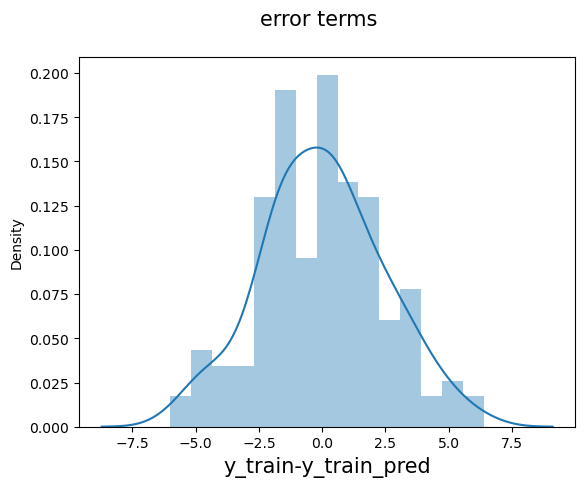

In [30]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('error terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

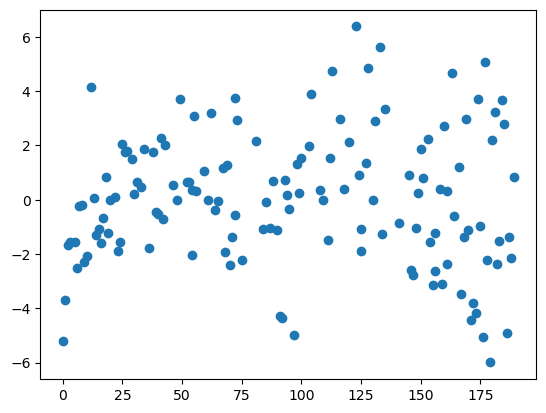

In [31]:
plt.scatter(x_train,res)
plt.show()

In [32]:
x_test_sn=sn.add_constant(x_test)
y_pred=lr.predict(x_test_sn)

In [33]:
y_pred.head()

126     7.155724
104    20.217698
99     14.156259
92     18.766367
111    20.644560
dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.1160327455410397

In [36]:
r_squared=r2_score(y_test,y_pred)
r_squared

0.7717069542191821

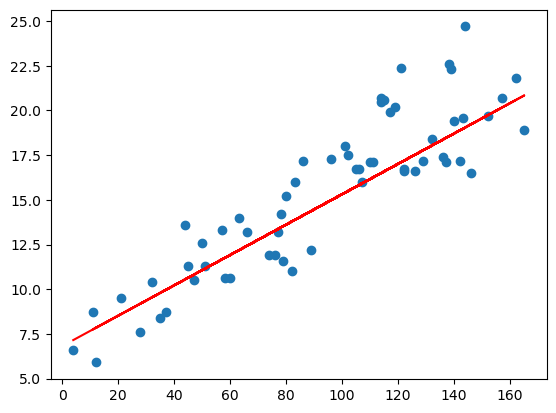

In [37]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.814+0.085*x_test,'r')
plt.show()